# Main Runner

## Imports

In [1]:
from objects import *
import pickle
import os
import plotly.express as px

## Generate Experiments

In [ ]:
prices = pd.read_parquet("raw_data/spx_stock_prices.parquet")
treasury_rate_files = ["daily-treasury-rates.csv"] + [f"daily-treasury-rates ({i}).csv" for i in range(1, 25)]
rates_df = [pd.read_csv(f"raw_data/{file}", index_col=0) for file in treasury_rate_files]
rates_df = pd.concat(rates_df)
rates_df.index = pd.to_datetime(rates_df.index)
# sort rates_df by date
rates_df = rates_df.sort_index()
print("Start Generation")
generate_experiments(prices, rates_df, 250, "experiments", lookback=48, error_max=10)

# Read in generated experiments
Only needed if running a single experiment. Otherwise, the experiments are read in from the ``experiments`` folder.

In [2]:
# Get all files in the experiments folder
experiment_names = os.listdir('experiments')
experiments = []
# read in pickle object
for e in experiment_names:
    with open(f"experiments/{e}", 'rb') as f:
        exp = pickle.load(f)
        experiments.append(exp)

In [10]:
policy = ColumnGenerationPolicy(experiments[2])
simulator = MarketSimulator(experiments[2], policy, verbose=False)
simulator.run()
simulator.total_trades

Current Portfolio Value at 2018-11-23: 345616.0
	 Optimizing with 31 time steps, 500 constraints, and 1240 variables...
	 Optimized. Time taken: 0.09472107887268066
Current Portfolio Value at 2018-11-26: 347650.76
	 Optimizing with 30 time steps, 484 constraints, and 1170 variables...
	 Optimized. Time taken: 0.09170007705688477
Current Portfolio Value at 2018-11-27: 347993.29000000004
	 Optimizing with 29 time steps, 468 constraints, and 1102 variables...
	 Optimized. Time taken: 0.07948493957519531
Current Portfolio Value at 2018-11-28: 354364.78
	 Optimizing with 28 time steps, 452 constraints, and 1036 variables...
	 Optimized. Time taken: 0.07621908187866211
Current Portfolio Value at 2018-11-29: 351835.5800000001
	 Optimizing with 27 time steps, 436 constraints, and 972 variables...
	 Optimized. Time taken: 0.06603217124938965
Current Portfolio Value at 2018-11-30: 353865.86000000004
	 Optimizing with 26 time steps, 420 constraints, and 910 variables...
	 Optimized. Time taken: 0

3

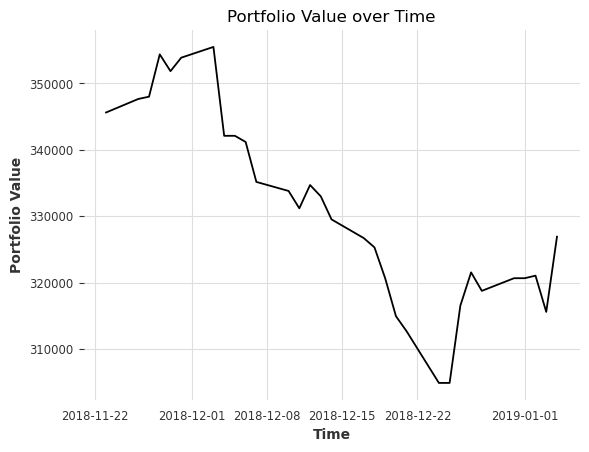

In [11]:
simulator.plot_value()

In [12]:
px.line(simulator.historical_trades)

## Evaluate Policies
Run multiple policies on a set of experiments.

In [ ]:
policies = [DIRECTIONAL_TRADING] + \
           [DIRECTIONAL_INCENTIVE_TRADING(0), DIRECTIONAL_INCENTIVE_TRADING(.25), DIRECTIONAL_INCENTIVE_TRADING(.5), DIRECTIONAL_INCENTIVE_TRADING(.75)] + \
           [NAIVE]
multi_sim = MultiSimRunner('experiments', policies, trim=29)
multi_sim.get_results("base_results29on.csv")

Running DirectionalIncentive_25.0 on 21_93324_93014_4:  11%|█▏        | 29/254 [22:19:41<7:48:25, 124.91s/it]         